In [1]:
from keras.datasets import mnist
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print("Original shapes: ")
print(f"train_data shape: {train_data.shape},\ntrain_labels shape: {train_labels.shape}")
print(f"test_data shape: {test_data.shape},\ntest_labels shape: {test_labels.shape}")

Original shapes: 
train_data shape: (60000, 28, 28),
train_labels shape: (60000,)
test_data shape: (10000, 28, 28),
test_labels shape: (10000,)


In [3]:
train_data = (train_data / 255).astype('float32')
test_data = (test_data / 255).astype('float32')

In [4]:
from keras.utils import to_categorical
classes = np.unique(train_labels)
n_classes = len(classes)
print(f"classes: {classes}, number of classes: {n_classes}")
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

classes: [0 1 2 3 4 5 6 7 8 9], number of classes: 10


In [5]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=20, batch_size=256, validation_data=(test_data, test_labels))

c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7214 - loss: 0.9313 - val_accuracy: 0.9317 - val_loss: 0.2082
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9478 - loss: 0.1626 - val_accuracy: 0.9643 - val_loss: 0.1079
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9693 - loss: 0.1000 - val_accuracy: 0.9704 - val_loss: 0.0869
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9760 - loss: 0.0774 - val_accuracy: 0.9726 - val_loss: 0.0842
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9813 - loss: 0.0601 - val_accuracy: 0.9793 - val_loss: 0.0640
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9838 - loss: 0.0511 - val_accuracy: 0.9755 - val_loss: 0.0720
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9880 - loss: 0.0380 - val_accuracy: 0.9849 - val_loss: 0.0472
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9900 - loss: 0.0339 - val_accu

Text(0.5, 1.0, 'Accuracy Curves')

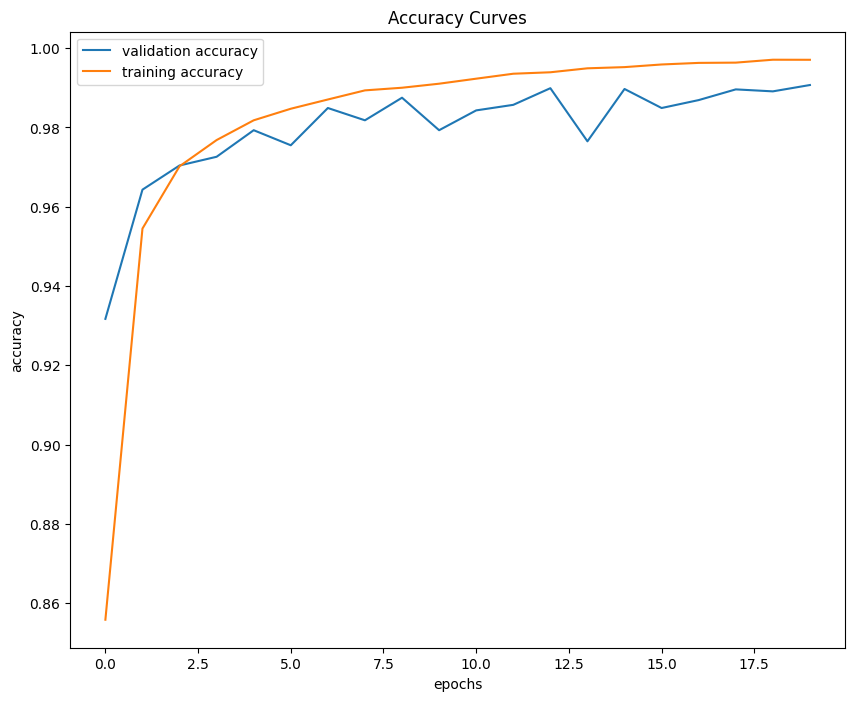

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["validation accuracy", "training accuracy"])
plt.title("Accuracy Curves")

Text(0.5, 1.0, 'Loss Curves')

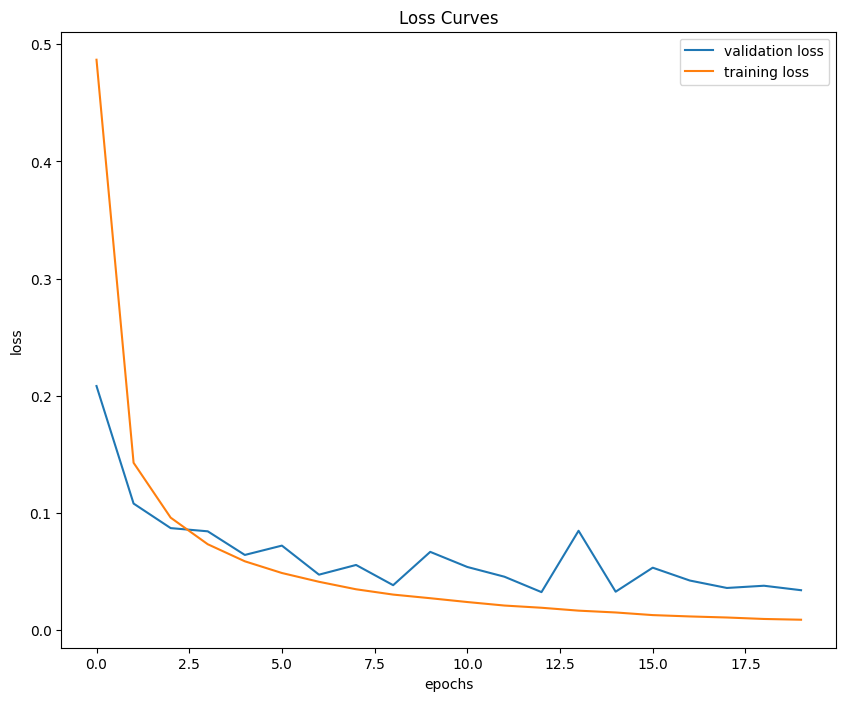

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["validation loss", "training loss"])
plt.title("Loss Curves")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


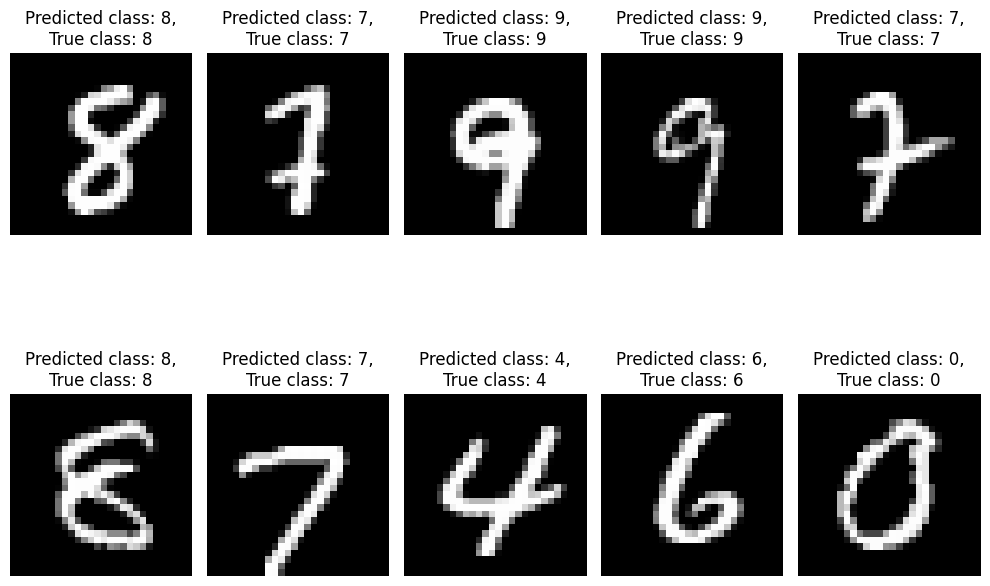

(1, 28, 28)


In [14]:
plt.figure(figsize=(10, 8))
for i in range(10):
    random_index = np.random.randint(test_data.shape[0])
    prediction_probabilities = model.predict(test_data[[random_index]])
    predicted_class = np.argmax(prediction_probabilities)
    true_class = np.argmax(test_labels[random_index])
    plt.subplot(2, 5, i + 1)
    plt.title(f"Predicted class: {predicted_class},\nTrue class: {true_class}")
    plt.axis("off")
    plt.imshow(test_data[random_index], cmap="gray")
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       980
     Class 1       1.00      0.99      1.00      1135
     Class 2       0.98      1.00      0.99      1032
     Class 3       0.99      0.99      0.99      1010
     Class 4       1.00      0.99      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       1.00      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       0.99      0.99      0.99       974
     Class 9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1129    1    0    0    2    1    1    1    0]
 [   2    1 1027    0    0    0    0    2    0    0]
 [   2    0    3  999    0    5    0    0

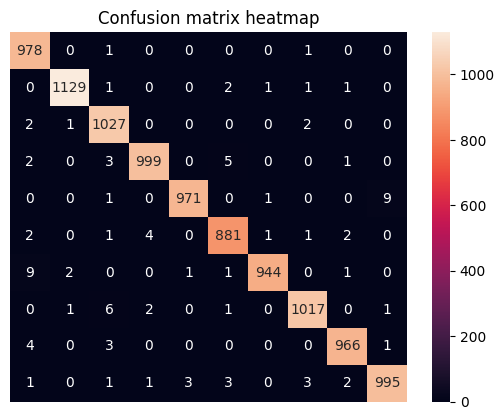

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

prediction_probabilities = model.predict(test_data)
predicted_labels = np.argmax(prediction_probabilities, axis=1)
test_labels_index = np.argmax(test_labels, axis=1)
print(classification_report(test_labels_index, predicted_labels, target_names=[f"Class {str(i)}" for i in range(10)]))

print(confusion_matrix(test_labels_index, predicted_labels))

import seaborn as sns

plt.figure()
plt.title("Confusion matrix heatmap")
sns.heatmap(confusion_matrix(test_labels_index, predicted_labels), annot=True, fmt='d') # , cmap='Blues' as args for differemt heatmap style
plt.axis("off")
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Model Loss on test data: {test_loss * 100:.2f}%\nModel Accuracy on test data: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.0499
Model Loss on test data: 3.39%
Model Accuracy on test data: 99.07%


<strong style="color: green;">FROM CHATGPT:</strong>

### Understanding the Classification Report and Confusion Matrix

#### 1. Classification Report
The classification report provides key metrics for evaluating the performance of a classification model. It includes precision, recall, and F1-score for each class, along with the support (number of true instances for each class).

**Key Metrics:**
- **Precision:** The ratio of true positive predictions to the total number of positive predictions. High precision means that the model doesn't often label negative samples as positive.
- **Recall:** The ratio of true positive predictions to the total number of actual positive instances. High recall means that the model identifies most of the positive instances correctly.
- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure of precision and recall, particularly useful when you need to find an optimal balance between them.
- **Support:** The number of actual occurrences of the class in the dataset.

**Interpreting the Report:**

- **Class-wise Metrics:**
  - For example, class '1':
    - **Precision = 1.00:** Almost all instances predicted as '1' were actually '1'.
    - **Recall = 0.99:** The model correctly identified 99% of all actual '1' digits.
    - **F1-Score = 1.00:** A high F1-score indicates a good balance between precision and recall.
    - **Support = 1135:** There are 1135 instances of the digit '1' in the test set.

- **Overall Metrics:**
  - **Accuracy = 0.99:** The model correctly predicted 99% of all test cases.
  - **Macro Avg:** Average metrics computed by treating all classes equally.
  - **Weighted Avg:** Average metrics weighted by the number of true instances for each class.

#### 2. Confusion Matrix
The confusion matrix provides a detailed breakdown of how the model's predictions compare to the actual labels for each class.

**Structure:**
- **Rows:** Represent the actual classes (true labels).
- **Columns:** Represent the predicted classes.

**Interpreting the Matrix:**
- **Diagonal Values:** These represent the number of correct predictions for each class.
- **Off-Diagonal Values:** These represent the number of misclassifications.

**Insights from the Confusion Matrix:**
- The model mostly predicts the correct digit (as shown by the high values along the diagonal).
- Misclassifications are minimal and spread across different classes, indicating that the model is generally robust across all digits.
- Specific misclassification patterns can help identify where the model might struggle (e.g., distinguishing between similar-looking digits like '9' and '4').

**Summary:** The model performs exceptionally well on the MNIST digits recognition task. The few errors it makes could be due to digits that look very similar to each other.
